In [9]:
# Install required libraries (only if not already available)
!pip install matplotlib scipy pandas --quiet

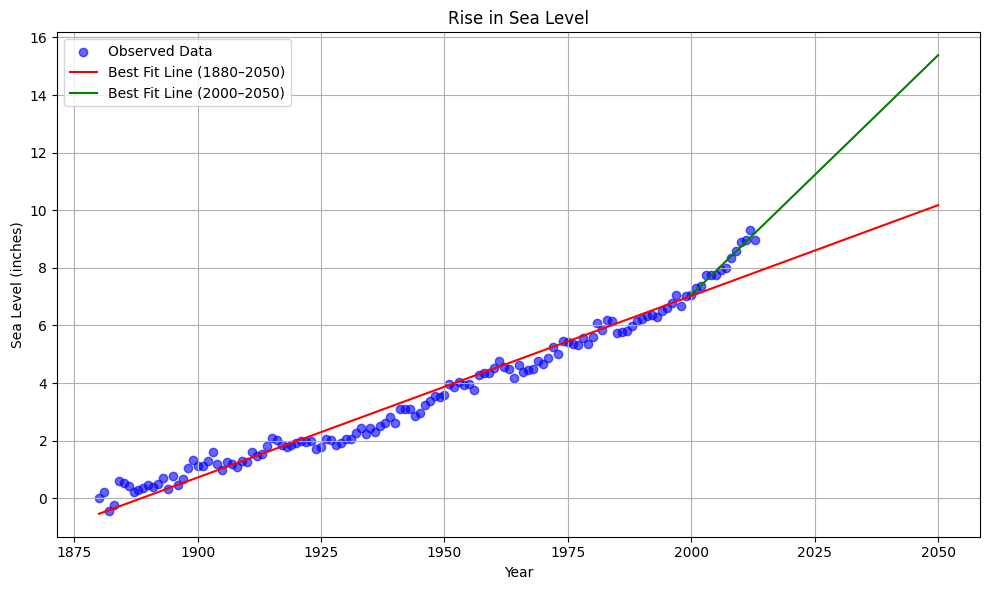

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Load the dataset
url = 'https://raw.githubusercontent.com/freeCodeCamp/boilerplate-sea-level-predictor/master/epa-sea-level.csv'
df = pd.read_csv(url)

# 📈 Function to draw and save the sea level prediction plot
def draw_plot():
    # Create scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(df['Year'], df['CSIRO Adjusted Sea Level'], label='Observed Data', color='blue', alpha=0.6)

    # 🌍 First Line of Best Fit (using full data)
    res_full = linregress(df['Year'], df['CSIRO Adjusted Sea Level'])
    x_full = pd.Series(range(1880, 2051))
    y_full = res_full.slope * x_full + res_full.intercept
    plt.plot(x_full, y_full, 'r', label='Best Fit Line (1880–2050)')

    # 📅 Second Line of Best Fit (from year 2000)
    df_recent = df[df['Year'] >= 2000]
    res_recent = linregress(df_recent['Year'], df_recent['CSIRO Adjusted Sea Level'])
    x_recent = pd.Series(range(2000, 2051))
    y_recent = res_recent.slope * x_recent + res_recent.intercept
    plt.plot(x_recent, y_recent, 'green', label='Best Fit Line (2000–2050)')

    # 🎨 Plot customization
    plt.title('Rise in Sea Level')
    plt.xlabel('Year')
    plt.ylabel('Sea Level (inches)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    # Save and return figure
    plt.savefig('sea_level_plot.png')
    plt.show()

# Call the function to generate the plot
draw_plot()
